In [2]:
import pandas as pd

In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df

TypeError: 'int' object is not callable

In [7]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt



In [8]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


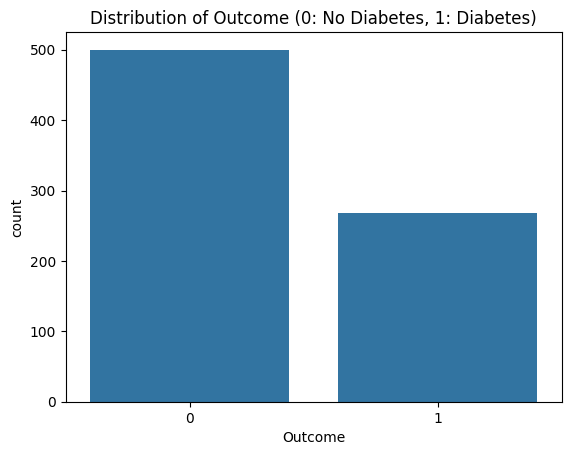

In [10]:
# Check the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome (0: No Diabetes, 1: Diabetes)")
plt.show()

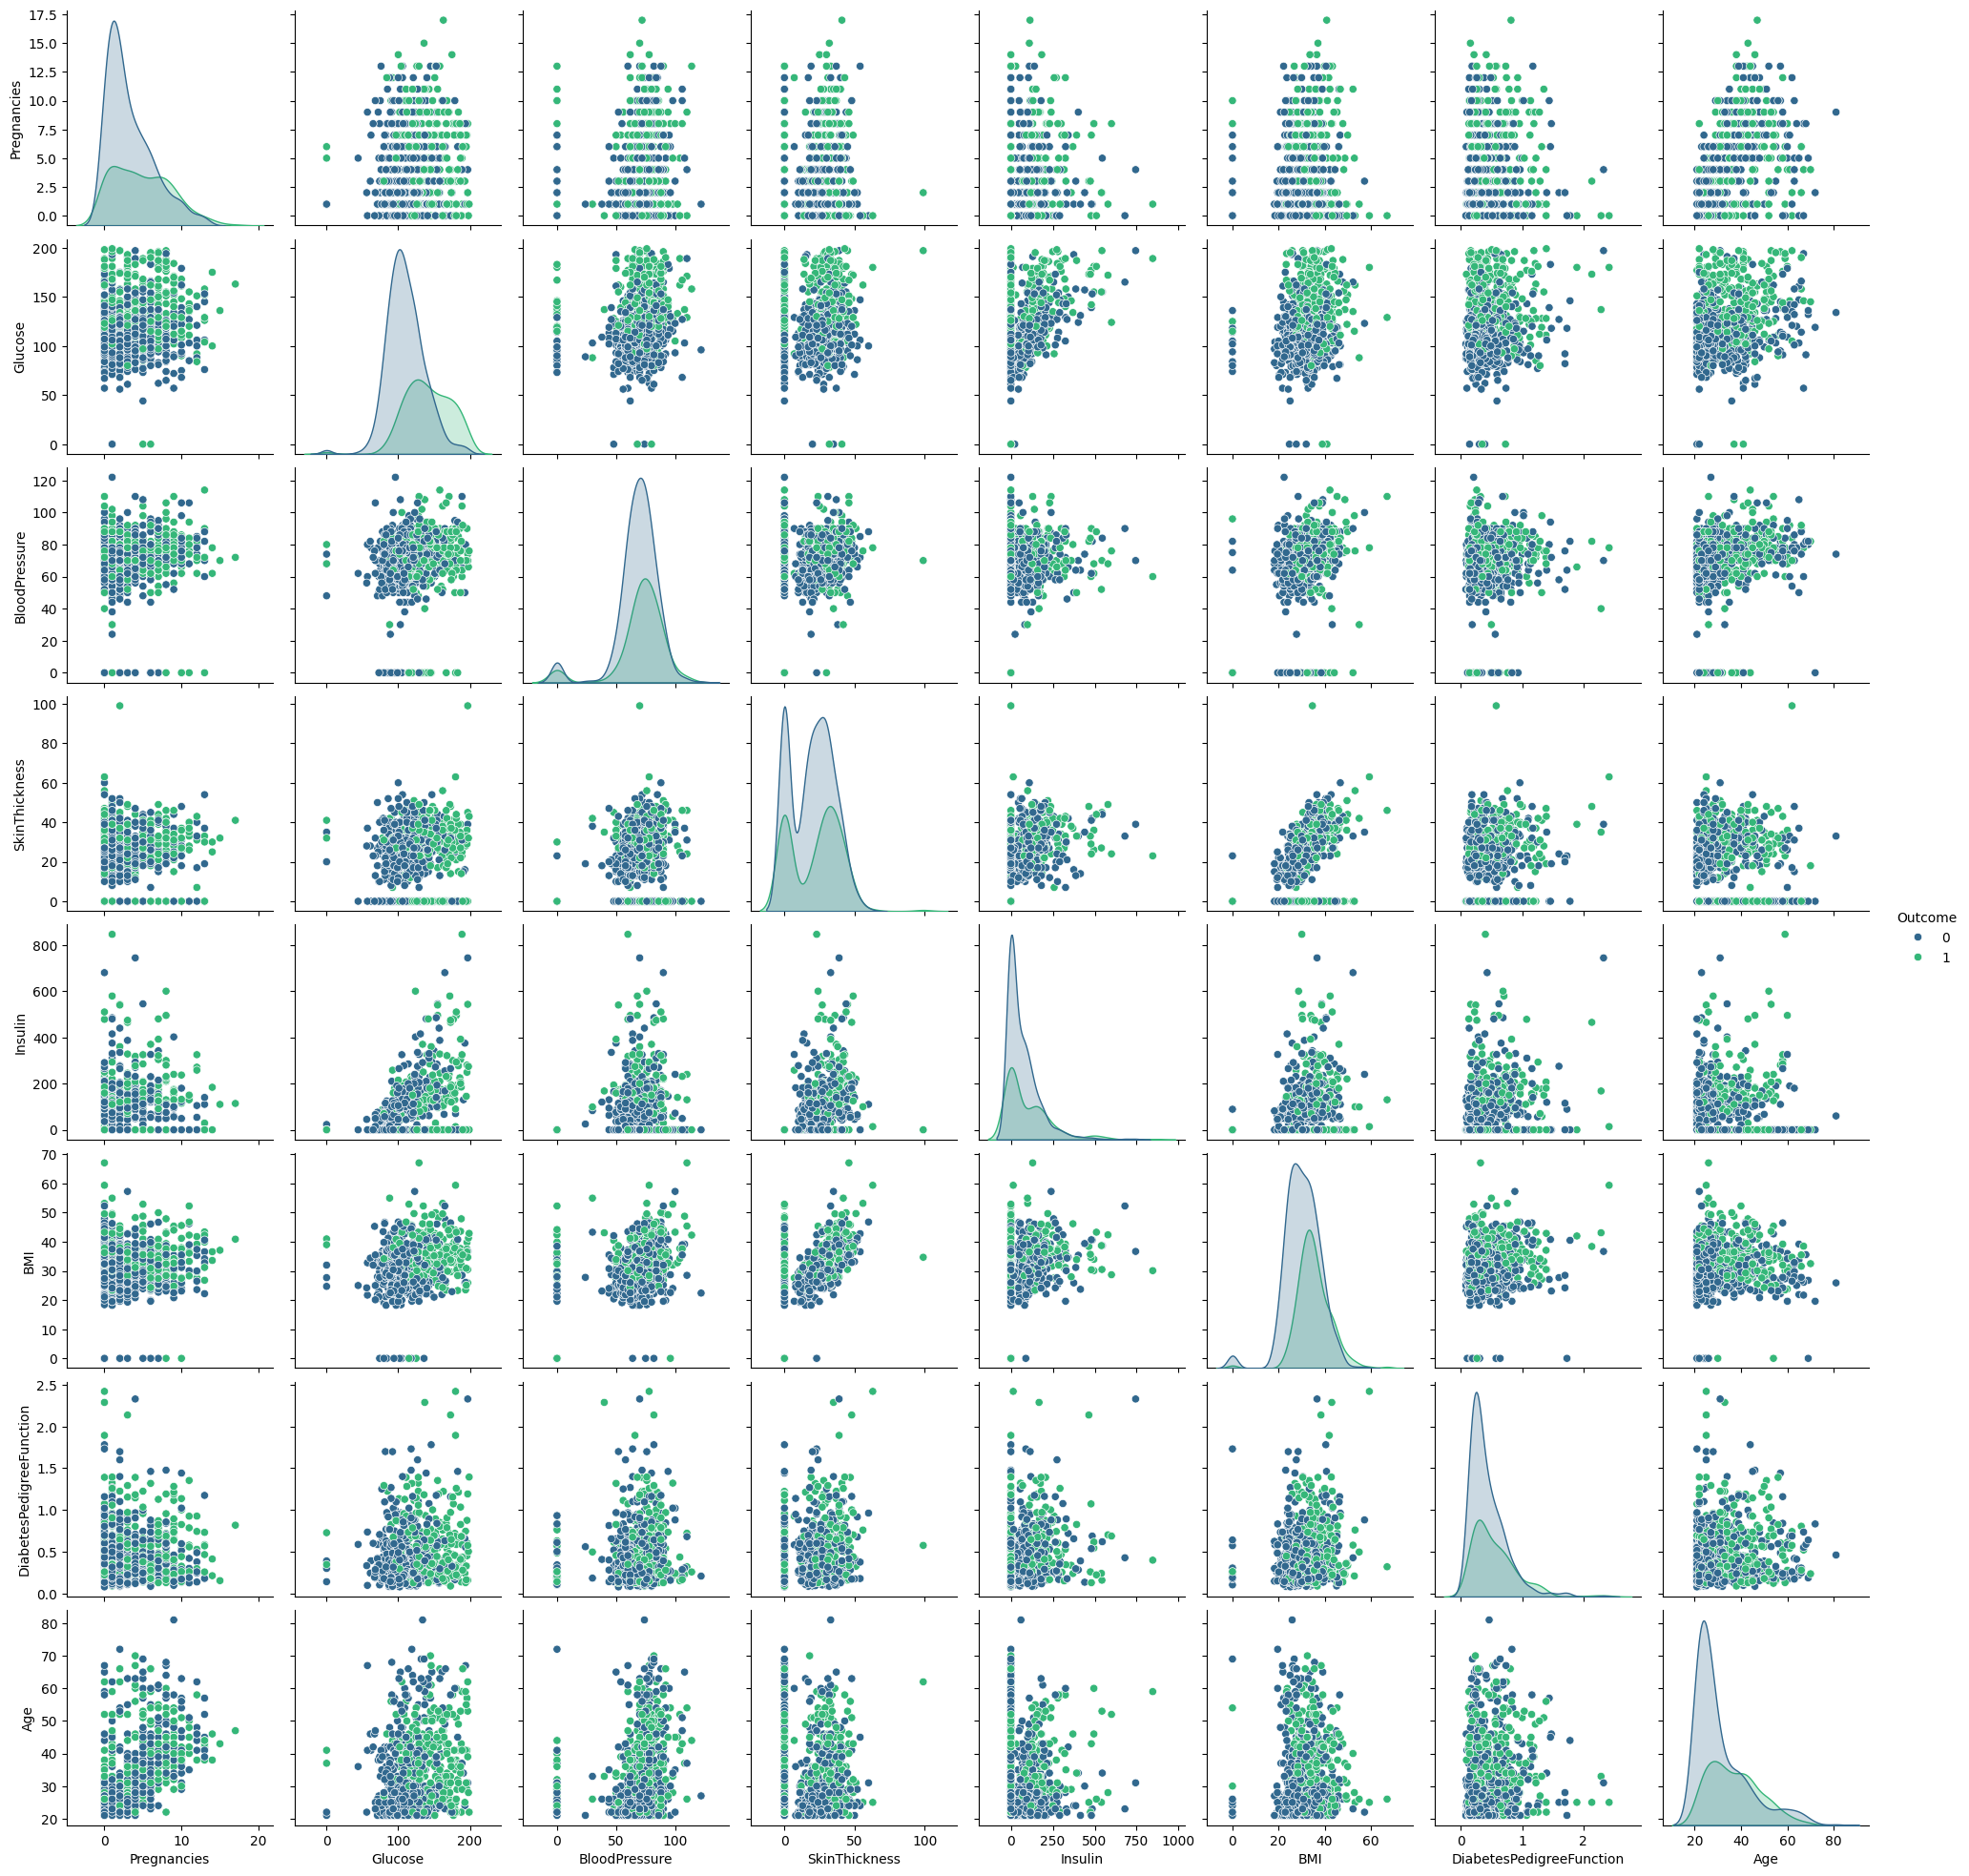

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Outcome', palette='viridis')
plt.show()

In [12]:
#data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
column_names = list(df.columns)
type(column_names)
column_names = column_names[:-1]
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [18]:
df[column_names] = df[column_names].replace(0,float('nan'))

In [19]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
df.fillna(df.mean(),inplace=True)

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
#feature and target
X = df[column_names]
y = df['Outcome']

In [23]:
len(X)

768

In [24]:
#Split dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [26]:
#Create a function for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
def train_and_evaluate(X_train,X_test,y_train,y_test,kernel="linear"):
    model = SVC(kernel=kernel,random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred,output_dict=True)
    cm = confusion_matrix(y_test,y_pred)
    
   
    
    return model,accuracy,report,cm

In [43]:
svm_model,accuracy,report,cm = train_and_evaluate(X_train,X_test,y_train,y_test)


In [44]:
 print(f"Accuracy: {accuracy}")

Accuracy: 0.7857142857142857


In [45]:
print(f"Classification Report: {report}")

Classification Report: {'0': {'precision': 0.8055555555555556, 'recall': 0.8787878787878788, 'f1-score': 0.8405797101449275, 'support': 99.0}, '1': {'precision': 0.7391304347826086, 'recall': 0.6181818181818182, 'f1-score': 0.6732673267326733, 'support': 55.0}, 'accuracy': 0.7857142857142857, 'macro avg': {'precision': 0.7723429951690821, 'recall': 0.7484848484848485, 'f1-score': 0.7569235184388003, 'support': 154.0}, 'weighted avg': {'precision': 0.7818322981366459, 'recall': 0.7857142857142857, 'f1-score': 0.780825287497694, 'support': 154.0}}


In [46]:
print(f"Confusion matrix:{cm}")

Confusion matrix:[[87 12]
 [21 34]]


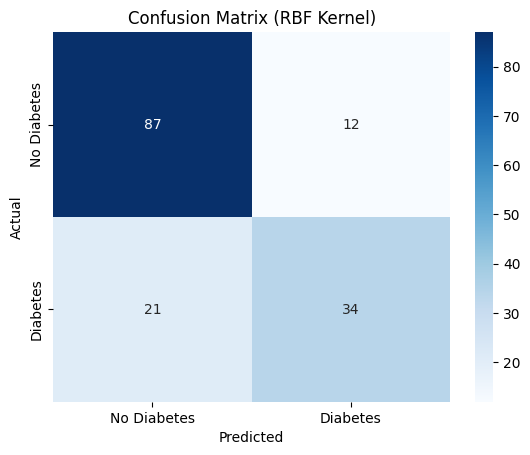

In [47]:
import seaborn as sns

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')
plt.show()

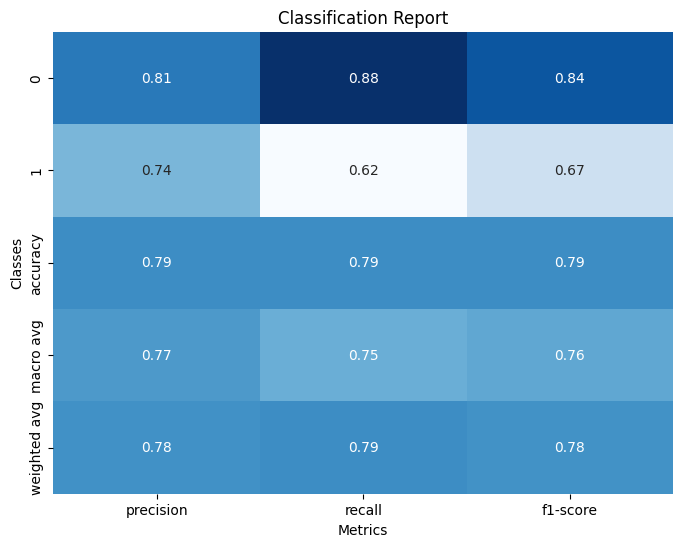

In [48]:
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' row for visualization (optional)
report_df = report_df.drop('support', axis=1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()